In [1]:
from matplotlib import pyplot as plt
from utils.utils import *
import utils.promethee_functions as pf
import utils.clustering_functions as cf

utils.py Loading


In [2]:
path = "../data/temp/all_stocks_5yr.csv"
# https://github.com/plotly/datasets/blob/master/all_stocks_5yr.csv

In [3]:
def read_stock_data(path):
    """ 
        Read the stock data from the csv file and return a dataframe with the following columns:
        name (index), open, high, low, close, volume
        each cell is the numpy array of the values of the stock over time
        It also returns the dates of the stocks (for plotting purposes)
    """

    def check_dates(dates):
        """ 
            Check that dates are the same for all stocks (necessary condition for applying the promethee method)
        """
        for i in range(1, len(dates)):
            if not np.array_equal(dates[i], dates[0]):
                return False
        return True

    def filter_by_dates(data):
        """ 
            The idea here is to only keep the stocks that have the same dates each time
        """
        filtered_data = data.copy()
        for i in range(len(data)):
            if not np.array_equal(data["date"].iloc[i], data["date"].iloc[0]):
                filtered_data = filtered_data.drop(data.index[i])
        return filtered_data

    # Read the data
    df = pd.read_csv(path)

    # Get the dates
    dates = df.groupby("Name").apply(lambda x: x["date"].values)
    
    # Create a new df with name as index and open, high, low, close, volume, dates as columns
    # Each cell is a np.array of the calues of the corresponding column for the stock
    data = df.groupby("Name").apply(lambda x: x[["open", "high", "low", "close", "volume"]].values)

    data = pd.DataFrame(data, index=data.index, columns=["data"])
    data["open"] = data["data"].apply(lambda x: x[:, 0])
    data["high"] = data["data"].apply(lambda x: x[:, 1])
    data["low"] = data["data"].apply(lambda x: x[:, 2])
    data["close"] = data["data"].apply(lambda x: x[:, 3])
    data["volume"] = data["data"].apply(lambda x: x[:, 4])

    # Add the dates
    dates = df.groupby("Name").apply(lambda x: x["date"].values)
    data["date"] = dates

    # Check that dates are the same for all stocks
    if not check_dates(data["date"].values):
        print("Dates are not the same for all stocks, a filtering will be applied")
        data = filter_by_dates(data)

        if not check_dates(data["date"].values):
           raise Exception("Dates are still not the same for all stocks")
        else:
            print("Data filtered successfully!")
            dates = data["date"].values[0]
        

    # Drop the useless column
    data = data.drop(columns=["data", "date"])
    return data, dates


# data, dates = read_stock_data(path)

In [4]:
def plot_stock_data(data, dates, legend=False):
    """ 
    For each column, plot a graph with one color per row (country in this case)
    On the x-axis, the years (1990-2022)
    Using subplots with two columns
    """
    x = np.arange(len(dates))
    Nb_cols = len(data.columns)
    fig, axs = plt.subplots((Nb_cols + 1) // 2, 2, figsize=(15, 10))
    axs = axs.flatten()

    lines = []
    labels = []

    for i, col in enumerate(data.columns[:]):
        for j, row in data.iterrows():
            line, = axs[i].plot(x, row[col], label=row.name)
            if i == 0:  # Collect labels only once
                lines.append(line)
                labels.append(row.name)
        axs[i].set_title(col)
    
    if legend:
        fig.legend(lines, labels, loc='center left', bbox_to_anchor=(1, 0.5))  # Add a single legend to the right
    
    plt.tight_layout()
    plt.show()

# plot_stock_data(data, dates, legend=False)

In [5]:
# small_data = data.iloc[:10]
# plot_stock_data(small_data, dates, legend=True)

In [6]:
def read_stock_data_company(path):
    """ 
        Read the stock data from the csv file and return a dataframe with the following columns:
        name (index), open, high, low, close, volume
        each cell is the numpy array of the values of the stock over time
        It also returns the dates of the stocks (for plotting purposes)
    """

    def check_dates(dates):
        """ 
            Check that dates are the same for all stocks (necessary condition for applying the promethee method)
        """
        for i in range(1, len(dates)):
            if not np.array_equal(dates[i], dates[0]):
                return False
        return True

    def filter_by_dates(data):
        """ 
            The idea here is to only keep the stocks that have the same dates each time
        """
        filtered_data = data.copy()
        for i in range(len(data)):
            if not np.array_equal(data["date"].iloc[i], data["date"].iloc[0]):
                filtered_data = filtered_data.drop(data.index[i])
        return filtered_data

    # Read the data
    df = pd.read_csv(path)

    # Get the dates
    dates = df.groupby("Company").apply(lambda x: x["Date"].values)
    
    # Create a new df with name as index and open, high, low, close, volume, dates as columns
    # Each cell is a np.array of the calues of the corresponding column for the stock
    data = df.groupby("Company").apply(lambda x: x[["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]].values)

    data = pd.DataFrame(data, index=data.index, columns=["data"])
    data["open"] = data["data"].apply(lambda x: x[:, 0])
    data["high"] = data["data"].apply(lambda x: x[:, 1])
    data["low"] = data["data"].apply(lambda x: x[:, 2])
    data["close"] = data["data"].apply(lambda x: x[:, 3])
    data["volume"] = data["data"].apply(lambda x: x[:, 4])
    data["dividends"] = data["data"].apply(lambda x: x[:, 5])
    data["stock_splits"] = data["data"].apply(lambda x: x[:, 6])

    # Add the dates
    dates = df.groupby("Company").apply(lambda x: x["Date"].values)
    data["date"] = dates

    # Check that dates are the same for all stocks
    if not check_dates(data["date"].values):
        print("Dates are not the same for all stocks, a filtering will be applied")
        data = filter_by_dates(data)

        if not check_dates(data["date"].values):
           raise Exception("Dates are still not the same for all stocks")
        else:
            print("Data filtered successfully!")
            dates = data["date"].values[0]
        

    # Drop the useless column
    data = data.drop(columns=["data", "date"])
    return data, dates


path2 = "../data/temp/stock_details_5_years.csv"

data, dates = read_stock_data_company(path2)

C:\Users\raphu\AppData\Local\Temp\ipykernel_30356\1016246875.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates = df.groupby("Company").apply(lambda x: x["Date"].values)


Dates are not the same for all stocks, a filtering will be applied
Data filtered successfully!


C:\Users\raphu\AppData\Local\Temp\ipykernel_30356\1016246875.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = df.groupby("Company").apply(lambda x: x[["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]].values)
C:\Users\raphu\AppData\Local\Temp\ipykernel_30356\1016246875.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates = df.groupby("Company").apply(lambda x: x["Date"

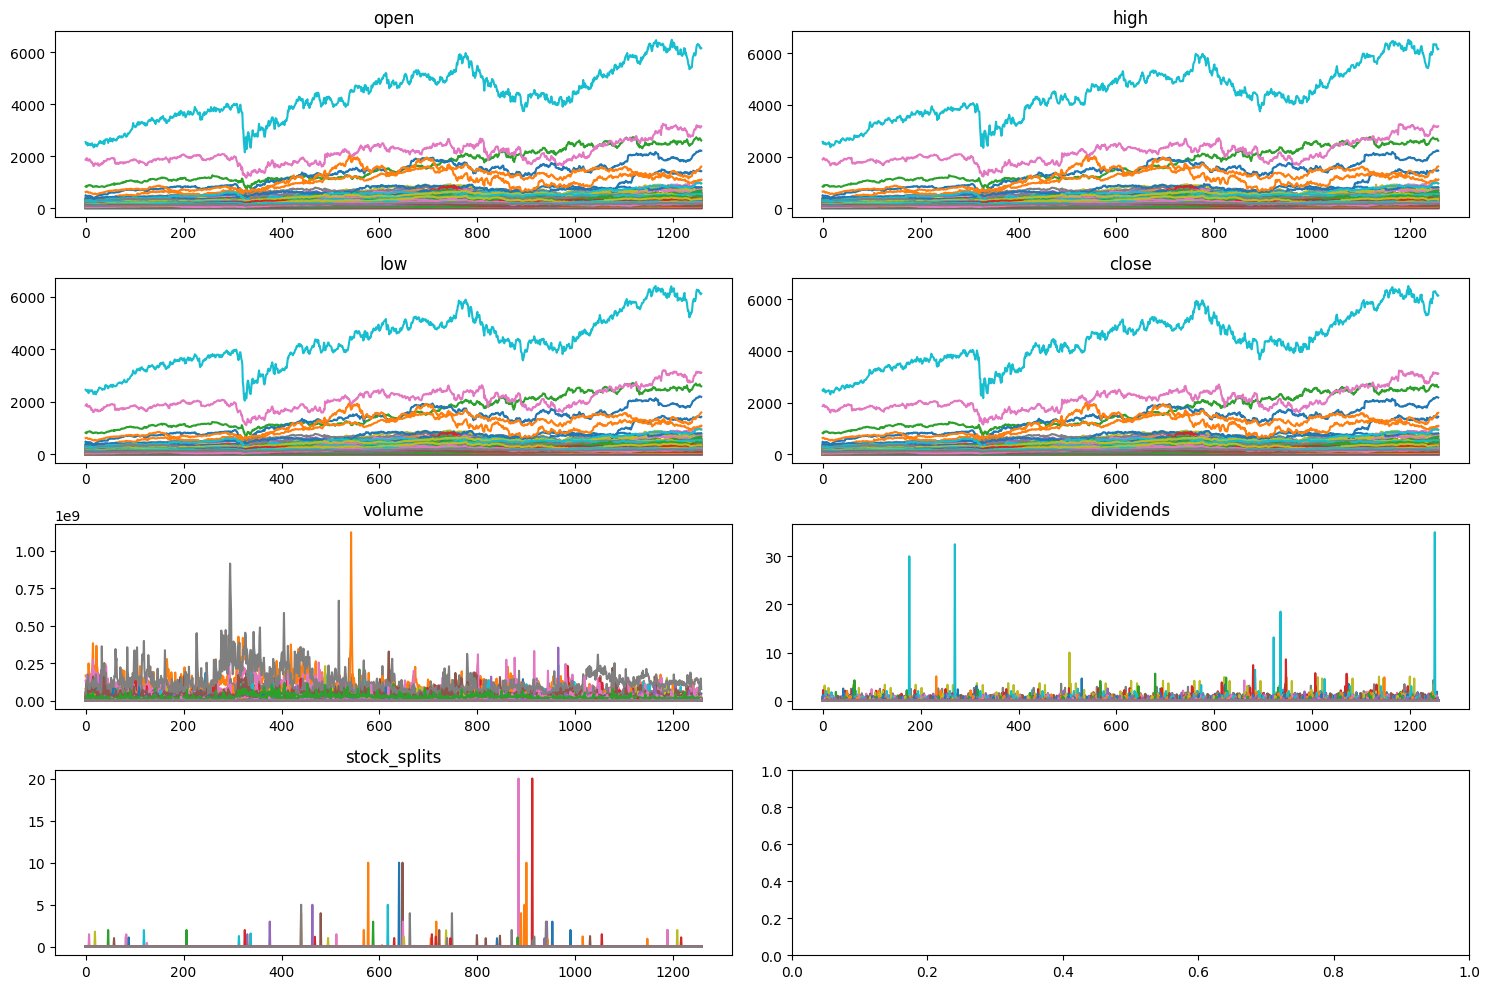

In [7]:
plot_stock_data(data, dates, legend=False)

In [8]:
data

,open,high,low,close,volume,dividends,stock_splits
Company,,,,,,,
A,"[68.6734578320634, 69.0590757021374, 70.698073...","[69.5893580467354, 70.0424702989454, 72.105670...","[68.6734578320634, 68.7794834091454, 70.563098...","[69.0012512207031, 69.7532348632813, 71.989974...","[2625800.0, 2279500.0, 4265200.0, 4263800.0, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
AAPL,"[43.829760572993, 43.2610708525148, 44.2616812...","[43.8633538041636, 43.270671010932, 44.3768575...","[42.6395935832266, 42.4788263653501, 43.481834...","[43.0835075378418, 42.8507537841797, 44.348064...","[167080000.0, 158126000.0, 163210000.0, 165377...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ABBV,"[70.4723507581345, 71.4620103708881, 74.676465...","[71.5174409644229, 74.6368637084961, 74.993160...","[69.9577216779672, 71.1532341713747, 73.488862...","[71.1849136352539, 74.6368637084961, 74.153923...","[3838000.0, 12031700.0, 6673900.0, 7008400.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ABEV,"[3.60648174531343, 3.5980354310235, 3.67405045...","[3.66560454212684, 3.64871193533834, 3.6909426...","[3.58114328875309, 3.56425069207255, 3.6149280...","[3.63182020187378, 3.60648131370544, 3.6487123...","[36131600.0, 21731300.0, 22078500.0, 23508600....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ABT,"[66.6024323901037, 67.9817468452309, 68.312774...","[67.7702477318005, 68.2576122778457, 68.892083...","[66.5472621108965, 67.1909400883213, 67.641506...","[67.3656539916992, 68.0920944213867, 68.294380...","[6447700.0, 8030500.0, 6430400.0, 7620100.0, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
XYL,"[66.7547077076412, 67.1310095077222, 70.376549...","[67.3661882943013, 68.7584809012258, 70.639955...","[66.05856422205, 66.7547131791459, 67.84597157...","[67.0745620727539, 68.6550064086914, 68.015304...","[790100.0, 1547800.0, 1421600.0, 1286100.0, 19...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
YUM,"[83.8320701766093, 83.9600372140322, 85.221355...","[84.4992861845161, 84.4901588665034, 85.221355...","[83.4116310682637, 83.4573344447465, 83.694977...","[83.9600296020508, 84.2890777587891, 84.151977...","[2003600.0, 4725100.0, 3648300.0, 2854900.0, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ZBH,"[106.74327109466, 107.593686076651, 109.902014...","[108.341336391869, 109.472118490186, 110.51881...","[106.74327109466, 107.322674858674, 108.500199...","[107.434829711914, 109.359970092773, 108.81794...","[964595.0, 1293783.0, 1585170.0, 1667467.0, 15...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [9]:
# Create a new variable that is the average of the open, high, low, close, volume
def create_new_variables(data):
    """ 
        Currently data is a dataframe with the following columns:
        open, high, low, close, volume
        - each cell is a numpy array of the values of the stock over time
        - the index is the name of the stock
    """
    new_data = data.copy()
    new_data["average"] = new_data.apply(lambda x: (x["open"] + x["high"] + x["low"] + x["close"] + x["volume"]) / 5, axis=1)
    new_data["Diff"] = new_data.apply(lambda x: (x["high"] - x["low"])/x["high"], axis=1)

    # Drop the useless columns
    new_data = new_data.drop(columns=["open", "high", "low", "close", "stock_splits", "dividends"])
    return new_data

new_data = create_new_variables(data)
new_data

,volume,average,Diff
Company,,,
A,"[2625800.0, 2279500.0, 4265200.0, 4263800.0, 3...","[525215.1875049863, 455955.5268528547, 853097....","[0.013161498257490533, 0.018031729669292094, 0..."
AAPL,"[167080000.0, 158126000.0, 163210000.0, 165377...","[33416034.683243103, 31625234.372264404, 32642...","[0.027899376468126808, 0.01829980046719967, 0...."
ABBV,"[3838000.0, 12031700.0, 6673900.0, 7008400.0, ...","[767656.6264854071, 2406398.377794392, 1334839...","[0.021808935910215266, 0.04667438265797385, 0...."
ABEV,"[36131600.0, 21731300.0, 22078500.0, 23508600....","[7226322.897009956, 4346262.883495875, 4415702...","[0.023041561740521084, 0.023148235531495396, 0..."
ABT,"[6447700.0, 8030500.0, 6430400.0, 7620100.0, 1...","[1289593.6571192448, 1606154.3044787266, 12861...","[0.018046055043858495, 0.015627153572006874, 0..."
...,...,...,...
XYL,"[790100.0, 1547800.0, 1421600.0, 1286100.0, 19...","[158073.45080445934, 309614.2598419994, 284375...","[0.01941068814133746, 0.02914211739142971, 0.0..."
YUM,"[2003600.0, 4725100.0, 3648300.0, 2854900.0, 3...","[400787.1406034063, 945087.2393216569, 729727....","[0.012871766915016824, 0.01222419789018035, 0...."
ZBH,"[964595.0, 1293783.0, 1585170.0, 1667467.0, 15...","[193004.85254165862, 258843.34968990367, 31712...","[0.01475028230618114, 0.019634621684102092, 0...."


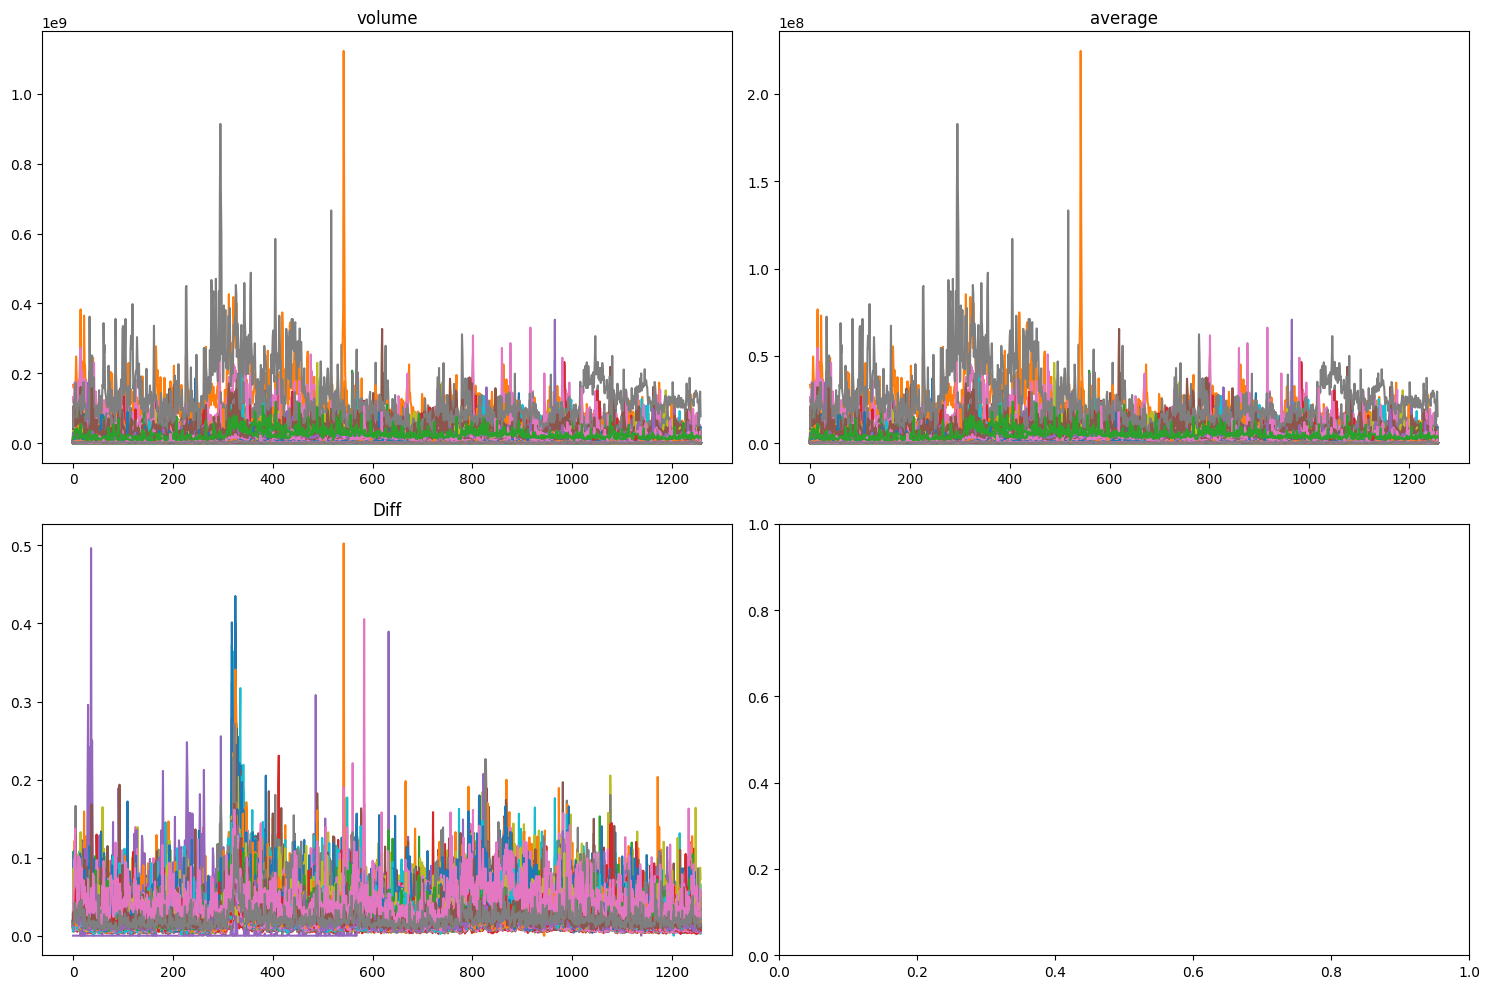

In [10]:
plot_stock_data(new_data, dates, legend=False)

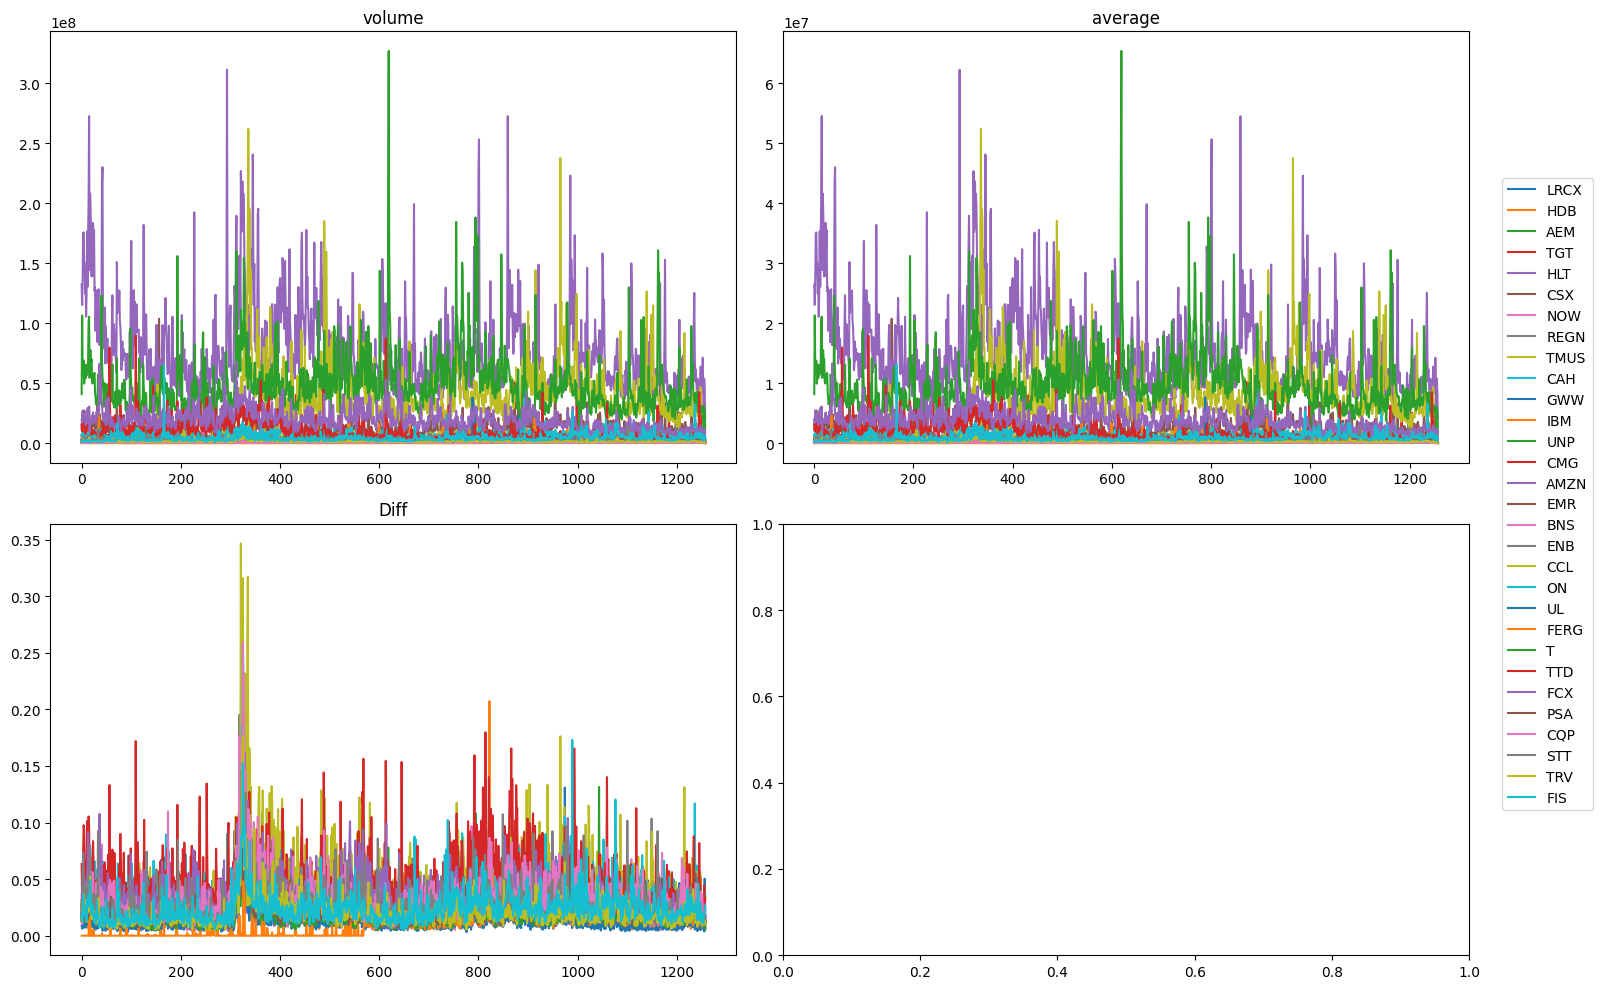

In [11]:
# Small data
small_data = new_data.sample(30)
plot_stock_data(small_data, dates, legend=True)

In [12]:
new_data

,volume,average,Diff
Company,,,
A,"[2625800.0, 2279500.0, 4265200.0, 4263800.0, 3...","[525215.1875049863, 455955.5268528547, 853097....","[0.013161498257490533, 0.018031729669292094, 0..."
AAPL,"[167080000.0, 158126000.0, 163210000.0, 165377...","[33416034.683243103, 31625234.372264404, 32642...","[0.027899376468126808, 0.01829980046719967, 0...."
ABBV,"[3838000.0, 12031700.0, 6673900.0, 7008400.0, ...","[767656.6264854071, 2406398.377794392, 1334839...","[0.021808935910215266, 0.04667438265797385, 0...."
ABEV,"[36131600.0, 21731300.0, 22078500.0, 23508600....","[7226322.897009956, 4346262.883495875, 4415702...","[0.023041561740521084, 0.023148235531495396, 0..."
ABT,"[6447700.0, 8030500.0, 6430400.0, 7620100.0, 1...","[1289593.6571192448, 1606154.3044787266, 12861...","[0.018046055043858495, 0.015627153572006874, 0..."
...,...,...,...
XYL,"[790100.0, 1547800.0, 1421600.0, 1286100.0, 19...","[158073.45080445934, 309614.2598419994, 284375...","[0.01941068814133746, 0.02914211739142971, 0.0..."
YUM,"[2003600.0, 4725100.0, 3648300.0, 2854900.0, 3...","[400787.1406034063, 945087.2393216569, 729727....","[0.012871766915016824, 0.01222419789018035, 0...."
ZBH,"[964595.0, 1293783.0, 1585170.0, 1667467.0, 15...","[193004.85254165862, 258843.34968990367, 31712...","[0.01475028230618114, 0.019634621684102092, 0...."


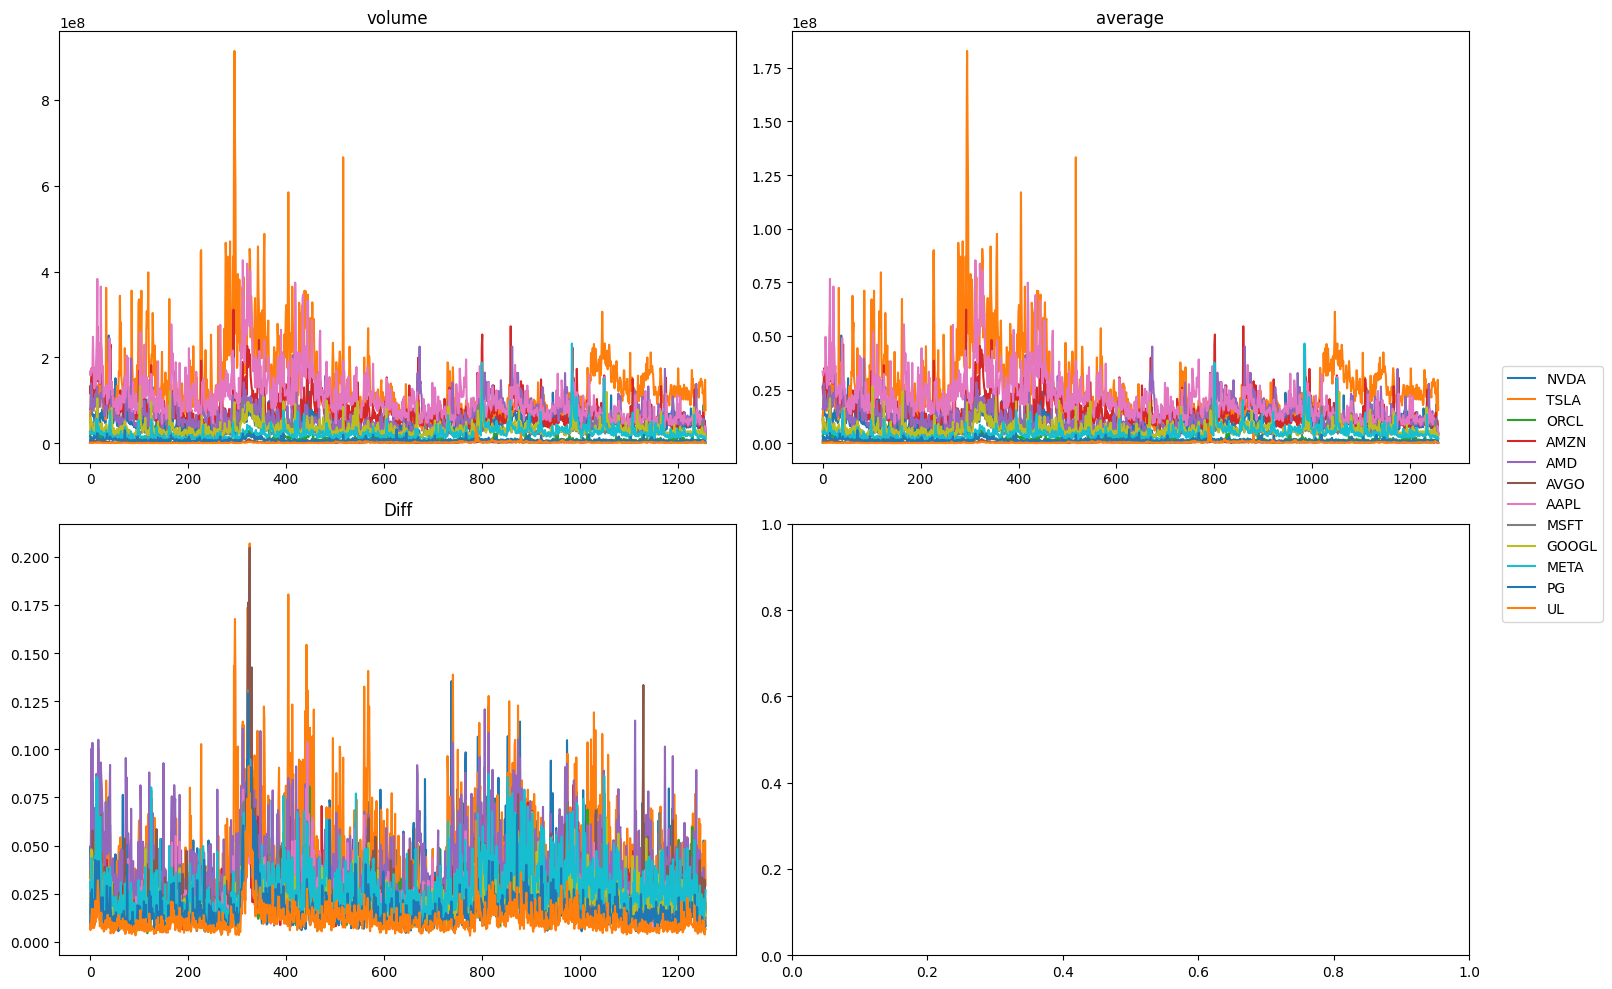

In [13]:
# NVDA, TSLA, PLTR, AMZN, AMD, AVGO, AAPL, MSFT, GOOGL, META, PG, UL

# TTE, WMT, V, JNJ, NFLX, KO, TMUS, CSCO

data = new_data.loc[["NVDA", "TSLA", "ORCL", "AMZN", "AMD", "AVGO", "AAPL", "MSFT", "GOOGL", "META", "PG", "UL"]]
other_data = new_data.loc[["WMT", "V", "JNJ", "NFLX", "KO", "TMUS", "CSCO", "TTE"]]

plot_stock_data(data, dates, legend=True)

## Promethee

In [14]:
get_min_max_criteria(data)

volume: min=320000.0, max=914082000.0
average: min=64041.1983, max=182816447.6385
Diff: min=0.0032, max=0.2069


In [15]:
K = data.columns.shape[0] # Nb of criteria
L = data.iloc[0]["Diff"].shape[0] # Length of the time series
N = data.shape[0] # Nb of alternatives

# Volume, Average, Diff
W = [0.1, 0.5, 0.4] # Weights of the criteria
P = [1000000, 1000000, 0.2] # Preference function parameters
Q = [10000, 1000, 0.005] # Indifference function parameters

c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


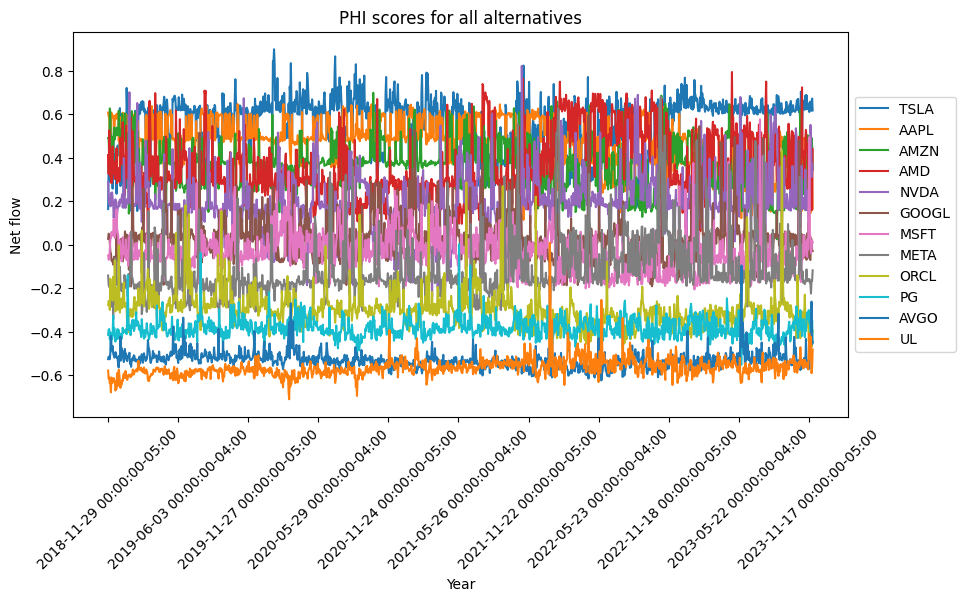

In [16]:
phi_c_all = pf.get_all_Phi_c(data, P,Q, L) # compute all mono criterion flows series
PHI = pf.PHI_all(phi_c_all, W, N, L, K) # Aggregate to the net flow series
# Transform PHI into a dataframe with ISO3 as index and years as columns
PHI_df = pd.DataFrame(PHI, index=data.index, columns=dates)
plot_PHI(PHI_df, True, False)

In [17]:
k = 3
results = cf.kMeans(PHI_df, k, max_it=100, distance_function=cf.euclid_distance)
# Print the results
for i in range(k):
    print(f"Cluster {i}: {results[i].index}")

groups = []
for i in range(k):
    groups.append(results[i].index)

100%|██████████| 100/100 [00:00<00:00, 165.25it/s]

Cluster 0: Index(['NVDA', 'MSFT', 'GOOGL', 'META'], dtype='object', name='Company')
Cluster 1: Index(['ORCL', 'AVGO', 'PG', 'UL'], dtype='object', name='Company')
Cluster 2: Index(['TSLA', 'AMZN', 'AMD', 'AAPL'], dtype='object', name='Company')


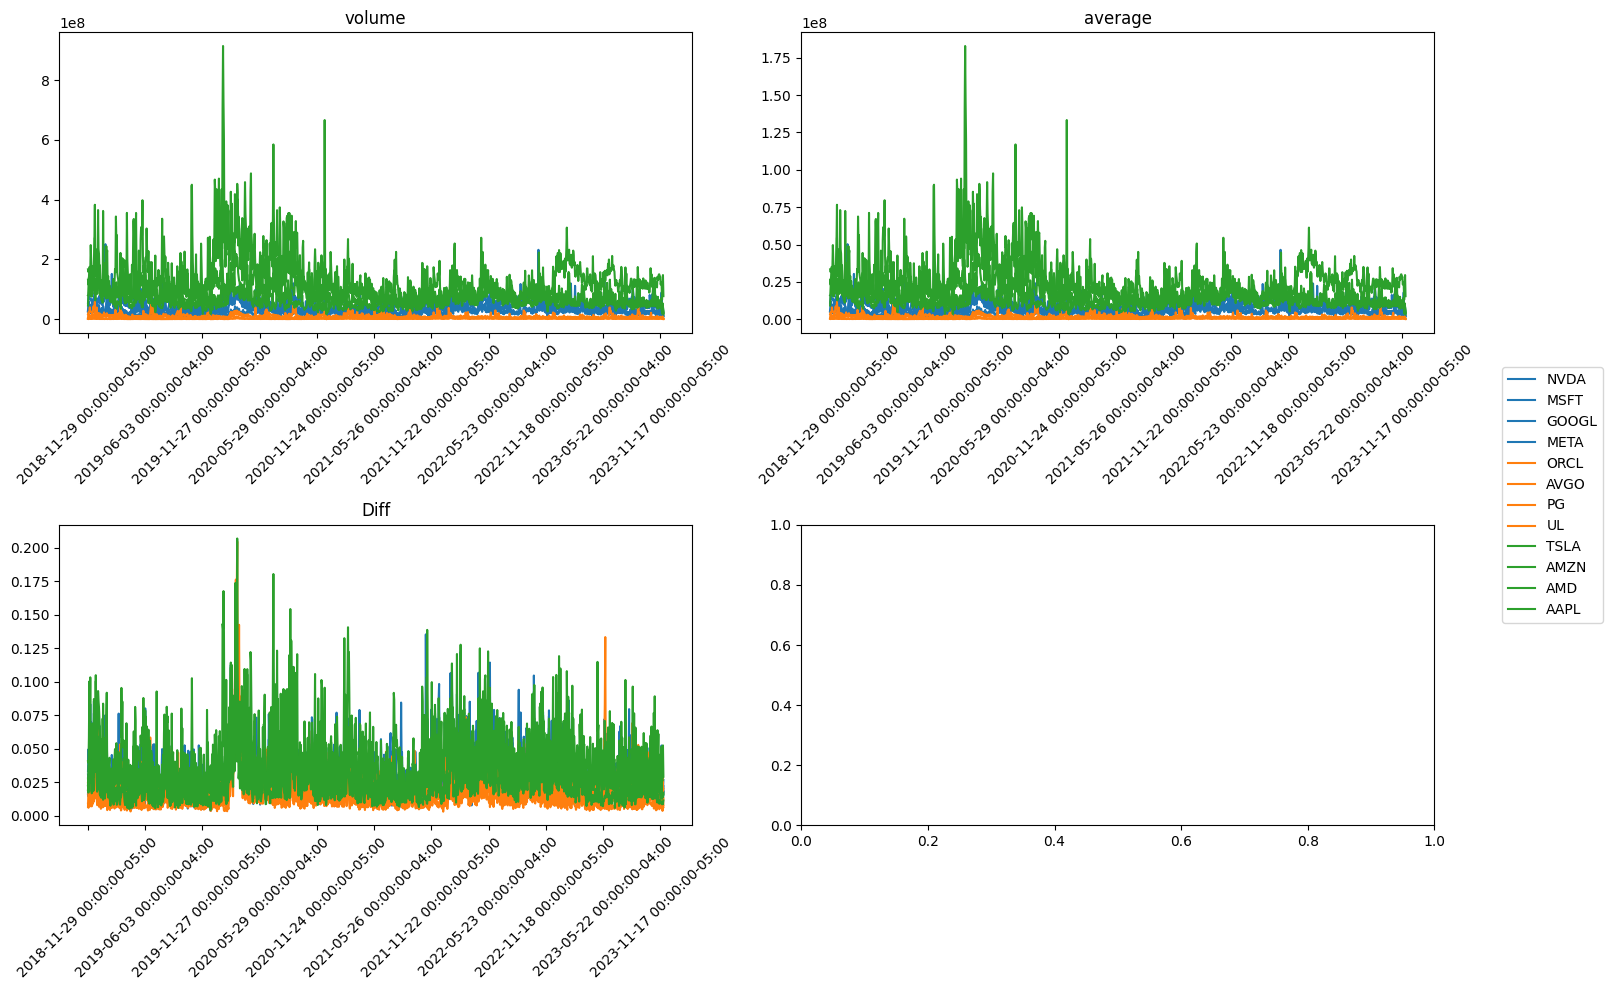

In [18]:
plot_cluster_general(groups, data, dates, legend=True)

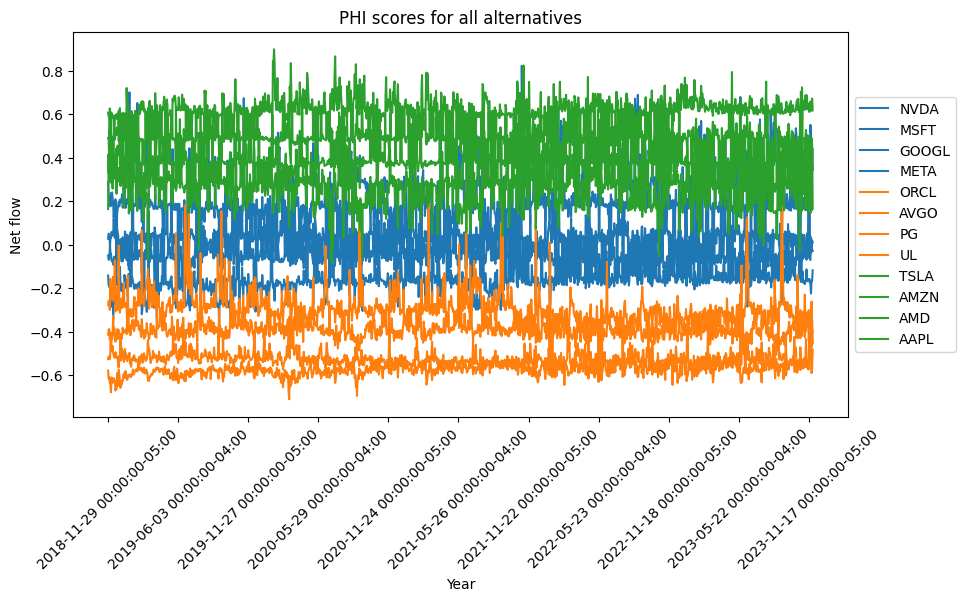

In [19]:
plot_cluster_phi(PHI_df, groups, True)

In [20]:
def G_Kmedoid(data, W, P, Q, L, Weight_vector, k=3, prototype_method="random"):
    """ 
    Function that receives the raw dataset and creates the clusters using the K-Medoid algorithm using Promethee Gamma as the distance matrix
    - data: pd.DataFrame with the raw dataset - iso3 as index and the criteria as columns names
    - W: list of weights for each criteria - must sum to 1
    - P: list of P thresholds for each criteria - must be > 0
    - Q: list of Q thresholds for each criteria - must be >= 0
    - Weight_vector: list of weights for each time point - must sum to 1
    - k: number of clusters to create
    """
    # Verify that the weights sum to 1
    print("Verifying the input data...")
    print("Shape of the dataset:", data.shape)

    if sum(W) != 1:
        raise ValueError("The weights must sum to 1")
    
    if len(W) != data.shape[1] or len(P) != data.shape[1] or len(Q) != data.shape[1]:
        raise ValueError("The number of weights, P and Q thresholds must be equal to the number of criteria")
    
    # Verify that the P thresholds are > 0
    if any([p <= 0 for p in P]):
        raise ValueError("The P thresholds must be > 0")
    
    # Verify that the Q thresholds are >= 0
    if any([q < 0 for q in Q]):
        raise ValueError("The Q thresholds must be >= 0")
    
    if sum(Weight_vector) != 1:
        raise ValueError("The time weight vector must sum to 1")
    
    if len(Weight_vector) != data.iloc[0]["Diff"].shape[0]:
        raise ValueError("The time weight vector must have the same length as the time series")
    
    print("Input data verified successfully!\n")

    # Get the criteria names
    alternatives = data.index

    # Computing the distance matrix
    print("Computing the distance matrix using Promethee Gamma...")
    phi_c_all = pf.get_all_Phi_c(data, P, Q, L)
    eta = pf.get_eta_matrix(data, phi_c_all, W, L)
    agg_eta = pf.aggregate_all_series(eta, Weight_vector)
    dist_matrix = pd.DataFrame(agg_eta, index=alternatives, columns=alternatives)
    print("Distance matrix computed successfully!\n")

    # Run the K-Medoid algorithm
    print("Running the K-Medoid algorithm...")
    medoids, clusters, iter = cf.K_Medoid_Eta(alternatives, dist_matrix, k, prototype_method=prototype_method, print_results=False)

    print("Converged after", iter, "iterations\nMedoids", medoids ,"\n")

    # Print the clusters one by one
    for i, cluster in enumerate(clusters):
        print("Cluster with Medoid", medoids[i])
        print(clusters[cluster], "\n")

    return medoids, clusters

Verifying the input data...
Shape of the dataset: (12, 3)
Input data verified successfully!

Computing the distance matrix using Promethee Gamma...


c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


Distance matrix computed successfully!

Running the K-Medoid algorithm...
Converged after 1 iterations
Medoids ['AMZN' 'ORCL' 'TSLA'] 

Cluster with Medoid AMZN
['AMZN', 'NVDA', 'AMD', 'AAPL'] 

Cluster with Medoid ORCL
['ORCL', 'AVGO', 'MSFT', 'GOOGL', 'META', 'PG', 'UL'] 

Cluster with Medoid TSLA
['TSLA'] 



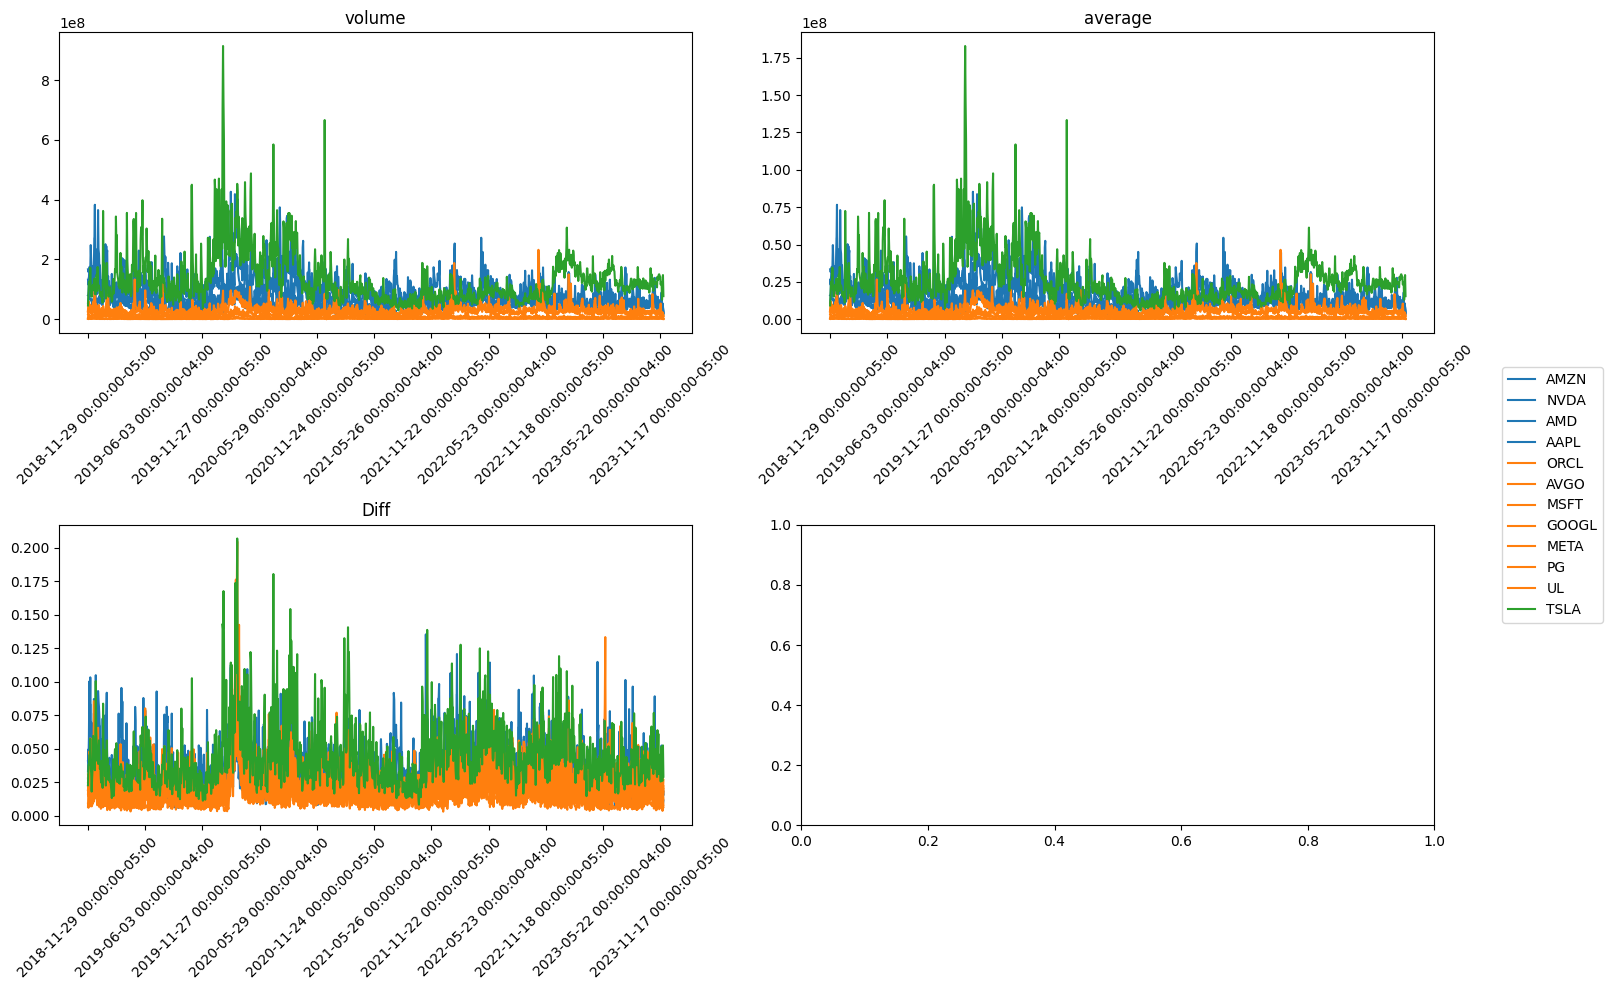

In [23]:
Weight_vector = [1/L for _ in range(L)] # Equal weights times

medoids, clusters = G_Kmedoid(data, W, P, Q, L, Weight_vector, k=3, prototype_method="random")

groups_gkm = []
for i, cluster in enumerate(clusters):
    groups_gkm.append(clusters[cluster])

plot_cluster_general(groups_gkm, data, dates, legend=True)